In [4]:
'''
by Dr. Pingkun Yan at BME @ RPI
The code requires installing opencv
'''

import numpy as np
import matplotlib.pyplot as plt

import cv2

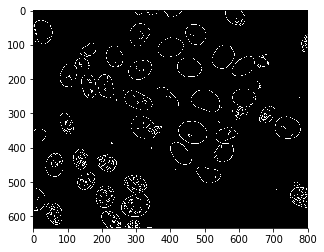

In [5]:
# Load image and detect edges
img = cv2.imread('GFP_06-DAPI.tif', 0)

edges = cv2.Canny(img, 30, 75)
plt.imshow(edges, cmap='gray')
plt.show()

In [6]:
# Python: cv2.HoughCircles(image, method, dp, minDist
#                          [, circles[, param1[, param2
#                          [, minRadius[, maxRadius]]]]])
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, 
                             param1=50, param2=20,
                             minRadius=10, maxRadius=50)

circles = np.uint16(np.around(circles))

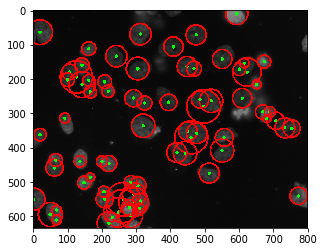

In [8]:
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(255,0,0),3)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,255,0),5)

cv2.imwrite('img_circles.png', cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))

plt.imshow(cimg)